In [107]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo   =   FlatLambdaCDM(H0=70,Om0=0.3,Tcmb0=2.725)
from astropy.io import ascii




def power_law(MUV,BETA,Z):
    models=[]
    xs=[]
    for i in range(0,len(MUV)):
        z=Z[i]
        Muv=MUV[i]
        beta=BETA[i]
        x=1215.67*(1+z)
        c=2.99792458E+18
        dL      =   cosmo.luminosity_distance(z).value
        DM=5*(np.log10(dL*10**6) - 1)
        K= 2.5*np.log10(1.+z)
        x_1500=1500.*(1+z)
        model=(c/x**2)*((x/x_1500)**(beta+2)) * 10**(-(Muv+48.6+DM-K)/2.5) #flambda
        models.append(model)
        xs.append(x)
    return xs,models

In [108]:
cat=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/Binospec-Candels.cat")
cat=cat[cat["EWLya"]>0]
cat=cat[cat["Type"]=="LAE"]

In [109]:
len(cat)

65

In [110]:
Muv=cat['Muv']
beta=cat['slope']
z=[]
for gal in cat:
    if gal["zsys"]>0:
        z.append(gal['zsys'])
    elif gal["z"]>0:
        z.append(gal['z'])
    elif gal["photoz"]>0:
        z.append(gal['photoz'])

z=np.array(z)
flya=[]
for gal in cat:
    if gal["LyaFlux"]<0:
        flya.append(gal["LyaFlux"])
    elif gal["FluxLim"]<0:
        flya.append(gal["FluxLim"])
flya=np.array(flya)



In [111]:
x,pL=power_law(Muv,beta,z)

In [112]:
EW=cat['EWLya']
dEW=cat["dEWLya"]

def GetEW(Lyaflux,UVflux,z):
    #b,c     =   fitParams[0],fitParams[1]
    #continuumWave=1215.67*(1+z)
    #logflux =   c+b*np.log10(continuumWave)
    #UVflux    =   UVflux*(2.998e18/(continuumWave**2))
    EW      =   (10**Lyaflux)/UVflux
    print(10**Lyaflux,UVflux,EW)
    EWrest=EW/(1+z)
    return EWrest

In [113]:
newEW=[]
for LYA,UV,Z in zip(flya,pL,z):
    print(GetEW(LYA,UV,Z))
    newEW.append(GetEW(LYA,UV,Z))
    print('  ')

6.72613267436182e-18 1.66805259603405e-20 403.23264927939476
57.9682434183749
6.72613267436182e-18 1.66805259603405e-20 403.23264927939476
  
1.9557246974576165e-17 1.1563182156918572e-19 169.13377917232344
26.166770455313742
1.9557246974576165e-17 1.1563182156918572e-19 169.13377917232344
  
6.680272767601644e-18 5.304335027768395e-20 125.9398724369815
17.64695937916555
6.680272767601644e-18 5.304335027768395e-20 125.9398724369815
  
7.161853628765182e-18 5.135071386381406e-20 139.4694073340237
22.611076349321756
7.161853628765182e-18 5.135071386381406e-20 139.4694073340237
  
9.881690725630128e-18 4.6869954486826616e-20 210.83209561057927
31.887859833083105
9.881690725630128e-18 4.6869954486826616e-20 210.83209561057927
  
1.1713640464741252e-17 4.6939969262531833e-20 249.5451243103231
37.43357995211564
1.1713640464741252e-17 4.6939969262531833e-20 249.5451243103231
  
1.445306781736259e-17 1.41866460009934e-19 101.87797606531196
15.542003891498027
1.445306781736259e-17 1.41866460009

In [114]:
#cat['EWLya']=newEW
#cat.write('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/Binospec-Candels.cat',format='ascii',overwrite=True)

In [115]:
len(newEW)


65

(0.0, 200.0)

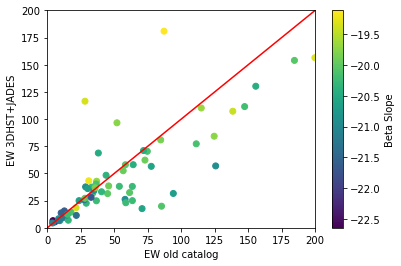

In [116]:
#plt.errorbar(EW,newEW,yerr=dEW,fmt='o')
sc = plt.scatter(EW, newEW, c=Muv, cmap='viridis')
plt.colorbar(sc, label='Beta Slope')
plt.plot([0,200],[0,200],color='red')
plt.xlabel("EW old catalog")
plt.ylabel("EW 3DHST+JADES")
plt.xlim(0,200)
plt.ylim(0,200)




In [12]:
for i in range(0,len(cat)):
    if -EW[i]+newEW[i]>EW[i]*0.2:
        print(EW[i],newEW[i],np.round(EW[i]-newEW[i]),cat[i]["id_charlotte"],cat[i]["z"])

87.0438781147921 129.35513833080256 -42.0 z5_GND_15562 nan
102.0021487955407 193.30609127458095 -91.0 z5_GNW_22336 nan
6.746844988673972 60.7586439526507 -54.0 z6_GNW_4311 nan
78.6835564995272 134.7060613449669 -56.0 z6_GNW_8472 nan
204.91515340437164 272.5262703823814 -68.0 z6_GNW_6554 nan
68.83606170025854 108.88203338174765 -40.0 z6_GNW_16141 nan
12.308866549208487 15.542003891498027 -3.0 z6_GNW_14478 5.555009043656363
56.605586358764306 72.57848146809185 -16.0 z6_GNW_16070 nan
60.82493581784659 117.04404227692073 -56.0 z6_GNW_16088 nan
13.706701494400862 16.7220722334792 -3.0 z6_GND_29564 nan
33.01950327817676 41.966294068955776 -9.0 z6_GND_25736 nan
131.77125204247025 164.70571732679855 -33.0 z6_GND_3883 nan
191.4949030874942 240.06112930935927 -49.0 z5_GND_10574 nan
4.2015594980547135 6.569048636217128 -2.0 z5_GND_7766 5.591906181481391
22.10447102993278 29.746060591991068 -8.0 z7_GND_34730 nan
45.923433163442176 115.98414582363105 -70.0 z5_GND_13996 nan
173.081174144998 208.3302

(array([ 1.,  1.,  0.,  8., 11.,  6., 14., 17., 25., 59., 40., 13.,  7.,
         8.,  7.,  4.,  2.,  1.,  2.,  2.]),
 array([-100.,  -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,  -20.,
         -10.,    0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,
          80.,   90.,  100.]),
 <BarContainer object of 20 artists>)

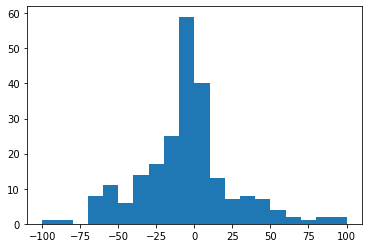

In [15]:
plt.hist(newEW-EW,bins=20,range=(-100,100))
#plt.xlim(-100,100)

In [16]:
object="Stark11_32_16773"
i=0
for gal in cat:
    if gal["id_charlotte"]==object:
        print(gal)
        print(i)
        print(gal["EWLya"])
    i=i+1

id_candels   id_charlotte    ra_candels  dec_candels KPNO_U_FLUX LBC_U_FLUX ACS_F435W_FLUX ACS_F606W_FLUX  ACS_F775W_FLUX    ACS_F814W_FLUX  ACS_F850LP_FLUX   WFC3_F105W_FLUX    WFC3_F125W_FLUX    WFC3_F140W_FLUX    WFC3_F160W_FLUX  KPNO_U_FLUXERR LBC_U_FLUXERR ACS_F435W_FLUXERR ACS_F606W_FLUXERR ACS_F775W_FLUXERR  ACS_F814W_FLUXERR  ACS_F850LP_FLUXERR WFC3_F105W_FLUXERR  WFC3_F125W_FLUXERR WFC3_F140W_FLUXERR  WFC3_F160W_FLUXERR         z               LyaFlux              LyaErr            LyaFWHM            Skewness      photoz    IDFink    FluxLim Type        HaFlux       dHaFlux        EWHa       dEWHa HaFWHM dHaFWHM        fesc        dfesc voff dvoff zsys        Muv                 dMuv              slope             dslope             EWLya              dEWLya          LyaFWHM_int        dLyaFWHM_int       Asymmetry      inFresco line  f090w_mag_aper_1  f090w_magerr_aper_1  f115w_mag_aper_1 f115w_magerr_aper_1  f150w_mag_aper_1  f150w_magerr_aper_1  f200w_mag_aper_1  f200w_mager

In [17]:
newEW[225]

43.24049587823718

(0.0, 300.0)

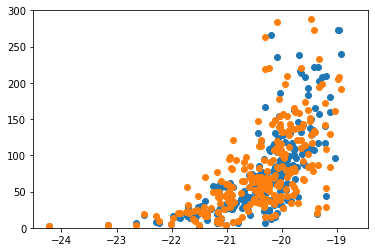

In [19]:
plt.plot(Muv,newEW,'o')
plt.plot(Muv,EW,'o')

plt.ylim(0,300)